In [98]:
import tensorflow as tf
import os
import shutil

In [135]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras


In [136]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
        'archive/train/',
        target_size=(64,64),
        batch_size=16,
        class_mode='binary')

Found 20000 images belonging to 2 classes.


In [137]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        'archive/test/',
        target_size=(64,64),
        batch_size=16,
        class_mode='binary')

Found 5000 images belonging to 2 classes.


In [138]:
#build CNN model
#initialize

cnn= tf.keras.models.Sequential()

In [139]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = [64,64,3]))

In [140]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [141]:
#providing one more layer 

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [142]:
#Flattten

cnn.add(tf.keras.layers.Flatten())

In [143]:
#full connection

cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [144]:
#output layer
 
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [145]:
#compile the model

cnn.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [146]:
cnn.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dense_15 (Dense)            (None, 128)             

In [122]:
#train the model

history = cnn.fit(train_generator,validation_data=validation_generator, epochs = 25)

Epoch 1/25
1250/1250 [==============================] - 107s 86ms/step - loss: 0.1211 - accuracy: 0.9537 - val_loss: 0.5950 - val_accuracy: 0.8354
Epoch 2/25
1250/1250 [==============================] - 101s 81ms/step - loss: 0.1261 - accuracy: 0.9518 - val_loss: 0.5792 - val_accuracy: 0.8366
Epoch 3/25
1250/1250 [==============================] - 102s 82ms/step - loss: 0.1160 - accuracy: 0.9564 - val_loss: 0.6461 - val_accuracy: 0.8304
Epoch 4/25
1250/1250 [==============================] - 101s 81ms/step - loss: 0.1136 - accuracy: 0.9576 - val_loss: 0.6349 - val_accuracy: 0.8370
Epoch 5/25
1250/1250 [==============================] - 99s 79ms/step - loss: 0.1124 - accuracy: 0.9555 - val_loss: 0.6790 - val_accuracy: 0.8318
Epoch 6/25
1250/1250 [==============================] - 95s 76ms/step - loss: 0.1130 - accuracy: 0.9573 - val_loss: 0.6566 - val_accuracy: 0.8256
Epoch 7/25
1250/1250 [==============================] - 104s 84ms/step - loss: 0.1070 - accuracy: 0.9607 - val_loss: 0.6

In [128]:
import numpy as np
from keras.utils import load_img, img_to_array
test_image= load_img('archive/predict/2.jpg', target_size= (64,64))
test_image= img_to_array(test_image)
test_image= np.expand_dims(test_image,axis=0)
result= cnn.predict(test_image)
train_generator.class_indices
if result[0][0]==1:
    prediction= 'dog'
else:
    prediction= 'cat'

1/1 [==============================] - 0s 43ms/step


In [129]:
prediction

'cat'

In [130]:
import matplotlib.pyplot as plt
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


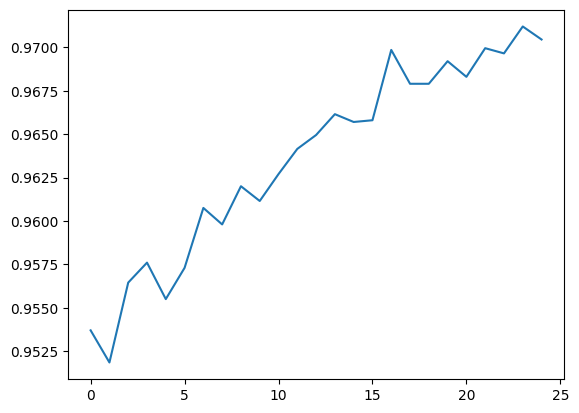

In [133]:
plt.plot(history.history['accuracy'])

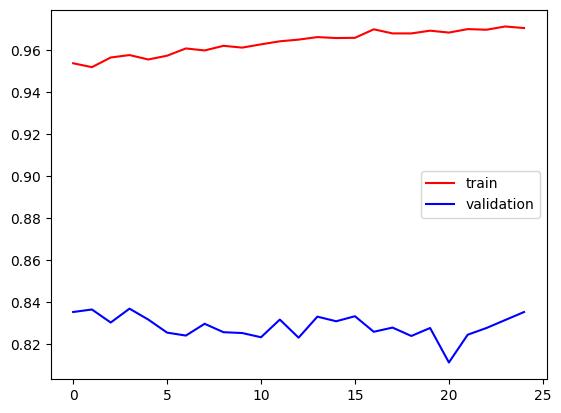

In [134]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()